        You just want [ ], you don't want my heart
        Maybe you just hate the thought of me with someone new
        Yeah, you just want [ ], I knew from the start
        You're just making sure I'm never gettin' over you


In [ ]:
!pip install d2l==0.17.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 244 kB/s 
     |████████████████████████████████| 9.9 MB 32.2 MB/s 
     |████████████████████████████████| 20.1 MB 1.5 MB/s 
     |████████████████████████████████| 11.6 MB 28.5 MB/s 
     |████████████████████████████████| 61 kB 6.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstall

In [ ]:
!pip uninstall matplotlib
!pip install -U matplotlib

# 좌측 상단 탭 {런타임} -> {런타임 다시 시작}

Found existing installation: matplotlib 3.3.3
Uninstalling matplotlib-3.3.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.3.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.5 MB/s 
     |████████████████████████████████| 944 kB 46.6 MB/s 
ERROR: pip's dependency resolver does n

# 10.1 Attention

## 학습목표

10.1 Attention mechanism을 이해한다. 

   

        10.1.1 Attention cues in biology
        10.1.2 Queries, keys, and values
        10.1.3 Visualization of attention
        
<br/>
<br/>

- 우리의 눈은 뇌가 한번에 처리하기에는 너무 많은 시각적 입력을 받는다.
- 하지만 우리가 실제로 볼 때에는 이 모든 입력에 대해 집중하지는 않기 때문에 보고싶은 목표지점에만 오롯이 집중할 수 있게 설계되어있다. 
- 또 한편으로 이런 attention은 한정된 자원이라 우리가 어딘가에 집중하게되면 반드시 기회비용이 발생하게 되어있다 (한번에 여러곳에 집중할 수 없음).
- 이렇게 사람이 어딘가 한 부분(관심영역)에 집중적으로 주의를 기울이는 특성을 구현한 모델이 attention 모델이다.
- two component of attention : nonvolitional cue (본질적인 특성이 튀는 경우), volitional cue (진행하고자 하는 테스크에 필요한 경우)

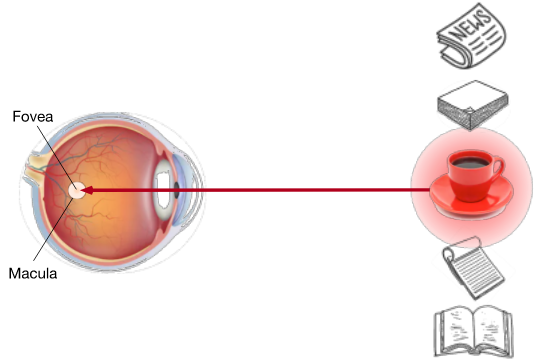


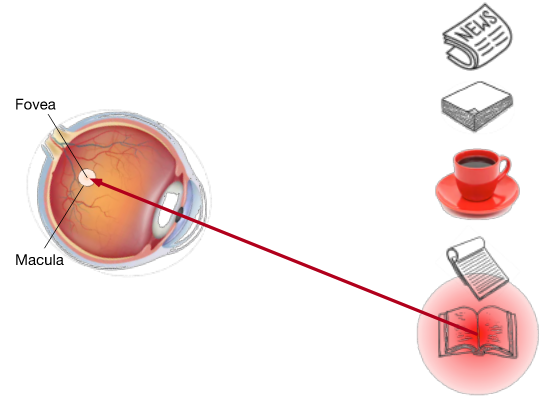

## 10.1.2 Queries, keys, values

- 만약 무의식적 신호 (= Keys) 만 존재한다고 가정한다면, 입력에 대한 bias selection을 위해서 단순히 fc layer, max/average pooling을 사용

- 특정 테스크를 염두하고 그것에 대한 자극 (의식적 신호 = Query)을 유입하기 위해서는, 추가적인 layer가 필요 -> attention layer  



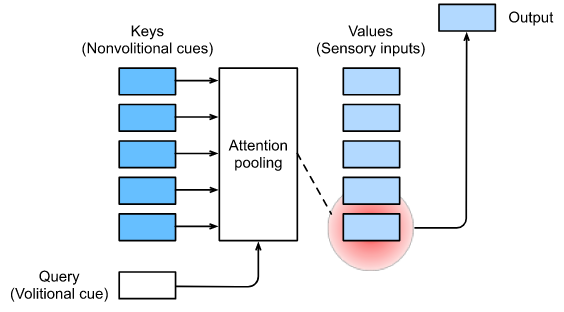

- Query: 딥러닝 공부를 해야 해 
- Keys: 커피를 마셔야만 머리가 돌아서 공부를 하겠지
- Values: 커피는 스벅이지 

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """Show heatmaps of matrices."""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

- 코드를 너무 어렵게 짬.
- 추후 여러 여러 매트릭스를 한번에 여러 구획에 보여주는 등의 기능을 갖게 하려고 복잡하게 짠것. 
- 사실 이 코드 하나만 있으면 구현이 됨: pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)

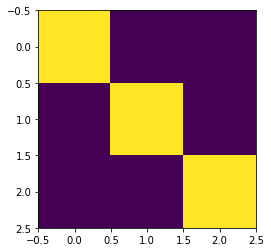

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

arr = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
plt.imshow(arr)

In [ ]:
torch.eye(10)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
torch.eye(10).reshape(1, 1, 10, 10)

tensor([[[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])

In [ ]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

TypeError: ignored

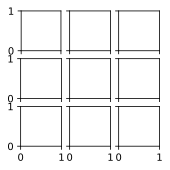

In [ ]:
attention_weights_test = torch.eye(3)
show_heatmaps(attention_weights_test, xlabel='keys', ylabel='queries')

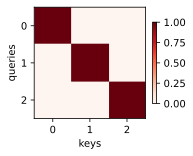

In [ ]:
attention_weights_test = torch.eye(3).reshape(1, 1, 3, 3)
show_heatmaps(attention_weights_test, xlabel='keys', ylabel='queries')

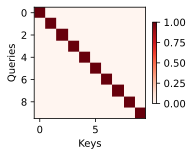

In [ ]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

## 10.1.4 Summary
Human attention is a limited, valuable, and scarce resource.

Subjects selectively direct attention using both the nonvolitional and volitional cues. The former is based on saliency and the latter is task-dependent.

Attention mechanisms are different from fully-connected layers or pooling layers due to inclusion of the volitional cues.

Attention mechanisms bias selection over values (sensory inputs) via attention pooling, which incorporates queries (volitional cues) and keys (nonvolitional cues). Keys and values are paired.

We can visualize attention weights between queries and keys.

## 10.1.5 Exercise
What can be the volitional cue when decoding a sequence token by token in machine translation? What are the nonvolitional cues and the sensory inputs?

Randomly generate a  10×10  matrix and use the softmax operation to ensure each row is a valid probability distribution. Visualize the output attention weights.

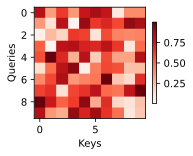

In [ ]:
import numpy as np 
np_array = np.random.rand(10, 10)
x_np = torch.from_numpy(np_array)
attention_weights = x_np.reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

# 10.2 Attention Pooling

## 학습목표

10.2 Attention pooling을 이해한다. \

    
        10.2.1 Generating the dataset 
        10.2.2 Average pooling
        10.2.3 Nonparametric attention pooling 
        10.2.4 Paramettric attention pooling 
        
<br/>
<br/>

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 10.2.1 Generating the Dataset
- attention 예제를 보기 위해 간단한 regression 문제를 정의
- 새로 들어오는 어떤 x에 대해서 어떻게 y를 예측할 것인가?

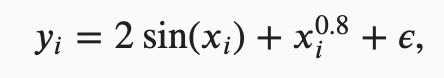

In [ ]:
n_train = 50  # No. of training examples

In [ ]:
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # Training inputs
print(x_train)

tensor([0.0537, 0.1484, 0.2170, 0.3288, 0.3506, 0.5153, 0.5879, 0.7079, 0.7389,
        0.8688, 0.9868, 1.0887, 1.0974, 1.1530, 1.3409, 1.4533, 1.4571, 1.5654,
        1.8942, 1.9077, 1.9355, 2.2002, 2.2987, 2.3196, 2.4930, 2.5146, 2.5547,
        2.9044, 3.0950, 3.3129, 3.3645, 3.3759, 3.3847, 3.4481, 3.6010, 3.6121,
        3.6427, 3.6539, 3.8033, 3.8886, 3.9619, 3.9932, 4.1424, 4.5132, 4.5909,
        4.6391, 4.6524, 4.6646, 4.8645, 4.9541])


In [ ]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # Training outputs

x_test = torch.arange(0, 5, 0.1)  # Testing examples

y_truth = f(x_test)  # Ground-truth outputs for the testing examples

n_test = len(x_test)  # No. of testing examples
n_test

50

In [ ]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'], xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

## 10.2.2 Average Pooling



We begin with perhaps the world's "dumbest" estimator for this regression problem:
using average pooling to average over all the training outputs:

$$f(x) = \frac{1}{n}\sum_{i=1}^n y_i,$$

which is plotted below. As we can see, this estimator is indeed not so smart.

- y_train 값의 평균을 구해 이를 output으로 삼는 방법. 
- 이 때, x_test (= Query)는 관여하지 않음 
- 성능이 좋지 않음

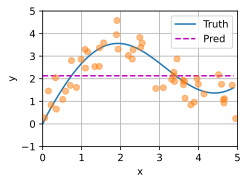

In [ ]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)

plot_kernel_reg(y_hat)

## 10.2.3 Nonparametric Attention Pooling

- Nadaraya-Watson kernel regression
- x : query   (x_test)
- xi : key    (x_train)
- yi : value  (y_train)

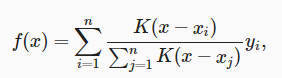

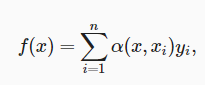

Gaussian kernel

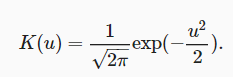

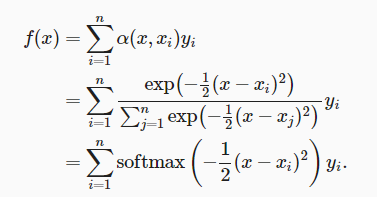

- 의식적 자극값 x (query)에 대해 비의식적 자극 xi (key) 값이 근사할 수록 yi (value)라는 sensory input에 곱해지는 attention 가중치가 커짐 

- 커피자국이 난 책 (Query)와 커피라는 mental image (Key)가 매우 유사함으로, 바나나우유, 콜라는 눈에 들어오지 않음 -> ㅅㅂㄱㄱ

- Nadaraya-Watson kernel regression은 비모수적 모델

In [ ]:
x_train

tensor([0.0537, 0.1484, 0.2170, 0.3288, 0.3506, 0.5153, 0.5879, 0.7079, 0.7389,
        0.8688, 0.9868, 1.0887, 1.0974, 1.1530, 1.3409, 1.4533, 1.4571, 1.5654,
        1.8942, 1.9077, 1.9355, 2.2002, 2.2987, 2.3196, 2.4930, 2.5146, 2.5547,
        2.9044, 3.0950, 3.3129, 3.3645, 3.3759, 3.3847, 3.4481, 3.6010, 3.6121,
        3.6427, 3.6539, 3.8033, 3.8886, 3.9619, 3.9932, 4.1424, 4.5132, 4.5909,
        4.6391, 4.6524, 4.6646, 4.8645, 4.9541])

In [ ]:
n_train = 5 
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
X_repeat

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
        [0.4000, 0.4000, 0.4000, 0.4000, 0.4000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.6000, 0.6000, 0.6000, 0.6000, 0.6000],
        [0.7000, 0.7000, 0.7000, 0.7000, 0.7000],
        [0.8000, 0.8000, 0.8000, 0.8000, 0.8000],
        [0.9000, 0.9000, 0.9000, 0.9000, 0.9000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.1000, 1.1000, 1.1000, 1.1000, 1.1000],
        [1.2000, 1.2000, 1.2000, 1.2000, 1.2000],
        [1.3000, 1.3000, 1.3000, 1.3000, 1.3000],
        [1.4000, 1.4000, 1.4000, 1.4000, 1.4000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.6000, 1.6000, 1.6000, 1.6000, 1.6000],
        [1.7000, 1.7000, 1.7000, 1.7000, 1.7000],
        [1.8000, 1.8000, 1.8000, 1.8000, 1.8000],
        [1.9000, 1.9000, 1.9000, 1.9000, 1.9000],


In [ ]:
n_train = 50 
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
X_repeat.shape

torch.Size([50, 50])

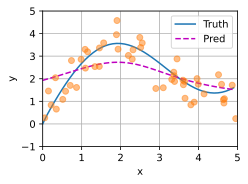

In [ ]:
# Shape of `X_repeat`: (`n_test`, `n_train`), 
# where each row contains the same testing inputs (i.e., same queries)

X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))

# Note that `x_train` contains the keys. 
# Shape of `attention_weights`: (`n_test`, `n_train`), 
# where each row contains attention weights to be assigned among the values (`y_train`) given each query

attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)

# Each element of `y_hat` is weighted average of values, where weights are attention weights

y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

In [ ]:
attention_weights.unsqueeze(0).unsqueeze(0).shape

torch.Size([1, 1, 50, 50])

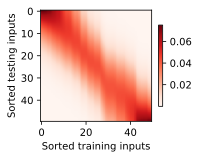

In [ ]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

## 10.2.4 Parametric Attention Pooling

비모수적 모델인 Nadaraya-Watson kernel regression의 장점은 충분한 데이터가 주어진다면, optimal solution에 가까워질것이다.

한편, 학습 가능한 parameter를 attention pooling에 대입해보는 것은 어려운일이 아님으로...

w: learnable parameter

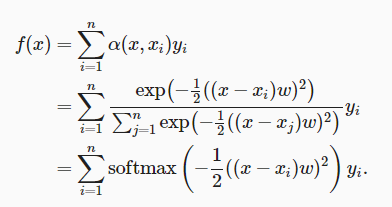

### 10.2.4.1 Batch Matrix Multiplication

To efficiently compute attention for minibatches:

In [ ]:
X = torch.ones((2,1,4))
Y = torch.ones((2,4,6))
torch.bmm(X,Y).shape

torch.Size([2, 1, 6])

In [ ]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
weights.unsqueeze(1).shape, values.unsqueeze(-1).shape

(torch.Size([2, 1, 10]), torch.Size([2, 10, 1]))

In [ ]:
weighted_values = torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))
weighted_values.shape

torch.Size([2, 1, 1])

### 10.2.4.3 Defining the Model

bmm을 이용해 모수적 attention pooling 기반의 모수적 버전의 Nadaraya-Watson kernel regression 모델을 구현: 

In [ ]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True)) 
        # torch.rand() random numbers from uniform distribution on [0,1)

    def forward(self, queries, keys, values):
        # Shape of the output `queries` and `attention_weights`:
        # (no. of queries, no. of key-value pairs)
        
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        
        self.attention_weights = nn.functional.softmax(-((queries-keys)*self.w)**2/2, dim=1)
        
        # Shape of `values`: (no. of queries, no. of key-value pairs)
        return torch.bmm(self.attention_weights.unsqueeze(1), values.unsqueeze(-1)).reshape(-1)

### 10.2.4.3 Training

In [ ]:
# Shape of `X_tile`: (`n_train`, `n_train`), where each column contains the same training inputs
X_tile = x_train.repeat((n_train, 1))

# Shape of `Y_tile`: (`n_train`, `n_train`), where each column contains the same training outputs
Y_tile = y_train.repeat((n_train, 1))

# Shape of `keys`: ('n_train', 'n_train' - 1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

# Shape of `values`: ('n_train', 'n_train' - 1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

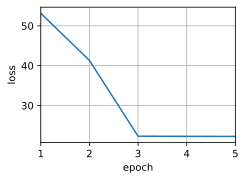

In [ ]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

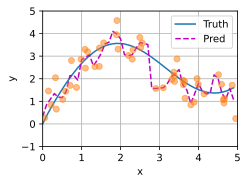

In [ ]:
# Shape of keys: (n_test, n_train), where each column contains the same training inputs (i.e., same keys)
keys = x_train.repeat((n_test, 1))
# Shape of value: (n_test, n_train)
values = y_train.repeat((n_test, 1))

y_hat = net(x_test, keys, values).unsqueeze(1).detach()

plot_kernel_reg(y_hat)

- 비모수적 attention pooling 기반 모델에 비해, attention weight 높은 부분이 좀 더 sharp하게 드러난다

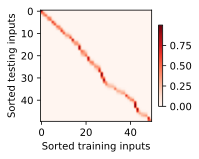

In [ ]:
d2l.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

## 10.2.5 Summary
- Nadaraya-Watson kernel regression is an example of machine learning with attention mechanisms.
- The attention pooling of Nadaraya-Watson kernel regression is a weighted average of the training outputs. From the attention perspective, the attention weight is assigned to a value based on a function of a query and the key that is paired with the value. 
- Attention pooling can be either nonparametric or parametric.

## 10.2.6 Exercise
Increase the number of training examples. Can you learn nonparametric Nadaraya-Watson kernel regression better?

What is the value of our learned  w  in the parametric attention pooling experiment? Why does it make the weighted region sharper when visualizing the attention weights?

How can we add hyperparameters to nonparametric Nadaraya-Watson kernel regression to predict better?

Design another parametric attention pooling for the kernel regression of this section. Train this new model and visualize its attention weights.

# 10.3 Attention Scoring Functions

## 학습목표

10.3. Attention Scoring Function을 이해한다. \
    - Attention Scoring Function (방법)에 따라, Attention의 종류가 나뉜다. (ex. Bahdanau, luong, multihead ..)
    
        10.3.1 Masked Softmax Operation
        10.3.2 Additive Attention
        10.3.3 Scaled Dot-Product Attention

<br/>
<br/>


10.2 복습
- Query와 Key 간의 상호작용을 모델화하기 위해 Gaussian Kernel을 사용
- **Gaussian Kernel의 지수를 attention scoring 함수로 취급**, 이후 softmax 연산에 입력

- Figure 10.3.1: Attention Pooling 
- Attention scoring 함수를 통해 두 백터값인 query, key 값을 넣고 softmax를 취해 attention weights (스칼라)를 구하는 과정
- Attention pooling 방법은 다양 (상황에 따라 선택), 그러나 컨셉은 동일
- Query와 밀접한 Keys는 더 큰 weight를 지니게 될 것이며, 그것을 점수화 한 뒤 softmax를 취해 0~1사이 값으로 변환, 이후 Values에 곱하고 모두 더해줌 (weighted sum)

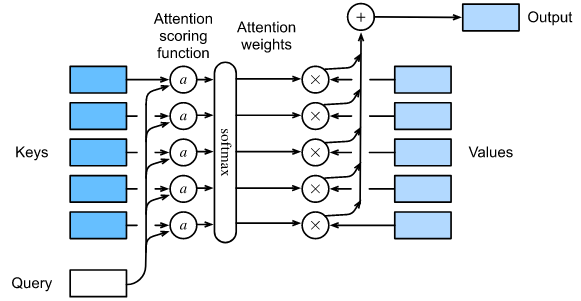

Mathematically,
suppose that we have
a query $\mathbf{q} \in \mathbb{R}^q$
and $m$ key-value pairs $(\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)$, where any $\mathbf{k}_i \in \mathbb{R}^k$ and any $\mathbf{v}_i \in \mathbb{R}^v$.
The **attention pooling $f$**
is instantiated as a weighted sum of the values:

$$f(\mathbf{q}, (\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)) = \sum_{i=1}^m \alpha(\mathbf{q}, \mathbf{k}_i) \mathbf{v}_i \in \mathbb{R}^v,$$


$$\alpha(\mathbf{q}, \mathbf{k}_i) = \mathrm{softmax}(a(\mathbf{q}, \mathbf{k}_i)) = \frac{\exp(a(\mathbf{q}, \mathbf{k}_i))}{\sum_{j=1}^m \exp(a(\mathbf{q}, \mathbf{k}_j))} \in \mathbb{R}.$$

## 10.3.1 Maked Softmax Operation

- 방금 언급했듯이 softmax 연산은 확률분포 (0~1)를 attention 가중치로 출력하는 데 사용
- 어떤 경우에는 모든 값이 attention 풀링에 입력되어야 하는 것은 아니다
- 예로, 섹션 9.5 의 효율적인 미니배치 처리를 위해 일부 텍스트 시퀀스는 의미가 없는 특수 토큰으로 채워짐
- 의미 있는 토큰만 값으로 풀링하기 위해 유효한 시퀀스 길이(토큰 수)를 지정하여 softmax 연산 시 지정된 범위를 벗어나는 것을 '0' padding으로 날려줌

- 요약: masked_softmax에서 유효한 길이를 초과하는 값은 0으로 마스킹!

In [ ]:
import math
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def masked_softmax(X, valid_lens):
    """Perform softmax operation by masking elements on the last axis"""
    # X: 3D tensor, valid_lens: 1D or 2D tensor
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(input=valid_lens, repeats=shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # On the last axis, replace masked elements with a very large negative value, whose exponentiation outputs=0
        X = d2l.sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=-1e6)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

- 예제: 2개의 2x4 행렬이 있을 때, 유효길이는 2, 3
- 각 행의 합 1 & 마스크 유효 길이를 초과한 값은 모두 0으로 마스킹

In [ ]:
a = torch.rand(2, 2, 4)*5
print(a)

b = masked_softmax(a, torch.tensor([2, 3]))
print(b)

tensor([[[2.8385, 0.7479, 1.3848, 3.3471],
         [1.1310, 1.5828, 0.5025, 3.7040]],

        [[2.7361, 4.8807, 0.0911, 4.9913],
         [4.5820, 4.0748, 1.5018, 3.5370]]])
tensor([[[0.8900, 0.1100, 0.0000, 0.0000],
         [0.3889, 0.6111, 0.0000, 0.0000]],

        [[0.1041, 0.8886, 0.0074, 0.0000],
         [0.6067, 0.3654, 0.0279, 0.0000]]])


- 2차원 텐서를 사용하여 각 행렬의 모든 행에 유효한 길이를 지정할 수도 있다

In [ ]:
masked_softmax(torch.rand(2, 2, 4), torch.tensor([[1, 3], [2, 4]]))

tensor([[[1.0000, 0.0000, 0.0000, 0.0000],
         [0.2791, 0.4121, 0.3088, 0.0000]],

        [[0.4894, 0.5106, 0.0000, 0.0000],
         [0.1974, 0.3460, 0.2790, 0.1776]]])

## 10.3.2 Additive Attention

- Query와 Key 벡터의 길이가 다른 경우, Additive Attention을 주로 사용 (<-masked softmax operation) 
- tanh 함수를 활성화 함수로 사용
- 각 MLP 층 bias term 비활성화

In general, when queries and keys are vectors of different lengths, we can use additive attention as the scoring function.


Given a query $\mathbf{q} \in \mathbb{R}^q$
and a key $\mathbf{k} \in \mathbb{R}^k$,
the *additive attention* scoring function


$$a(\mathbf q, \mathbf k) = \mathbf w_v^\top \text{tanh}(\mathbf W_q\mathbf q + \mathbf W_k \mathbf k) \in \mathbb{R},$$

where
learnable parameters
$\mathbf W_q\in\mathbb R^{h\times q}$, $\mathbf W_k\in\mathbb R^{h\times k}$, and $\mathbf w_v\in\mathbb R^{h}$.

By using  ***tanh***  as the activation function and disabling bias terms, we implement additive attention in the following.

 AdditiveAttention class 예제

(input)
- Shape: ([batch size, number of steps (or sequence length in tokens), feature size])
- Querys = ($2$, $1$, $20$) 
- Keys = ($2$, $10$, $2$)
- Values = ($2$, $10$, $4$)

(output)
- Shape: ([batch size, number of steps for queries, feature size for values])
- Attention pooling output = ($2$, $1$, $4$)

In [ ]:
class AdditiveAttention(nn.Module):
    """Additive attention."""
    def __init__(self, key_size, query_size, num_hiddens, dropout, **kwargs):
        super(AdditiveAttention, self).__init__(**kwargs)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens):
        queries, keys = self.W_q(queries), self.W_k(keys)
        
        features = queries.unsqueeze(2) + keys.unsqueeze(1)                 
        # queries shape: ([batch_size, num_queries, 1, num_hiddens]) 
        # keys shape: ([batch_size, 1, num_key-value pairs, num_hiddens])
        
        features = torch.tanh(features)
        
        scores = self.w_v(features).squeeze(-1)                       
        # scores shape:([batch_size, num_queries, num_key-value pairs)
        
        self.attention_weights = masked_softmax(scores, valid_lens)     
           
        return torch.bmm(self.dropout(self.attention_weights), values)  
        # values shape: ([batch_size, num_key-value pairs, value dimension])
        # attention pooling output shape: ([batch_size, num_steps for queries, feature size for values])

In [ ]:
queries = torch.normal(mean=0, std=1, size=(2, 1, 20))
keys = torch.ones((2, 10, 2))
values = torch.arange(40, dtype=torch.float32).reshape(1, 10, 4).repeat(2, 1, 1) # shape: ([2, 10, 4])
valid_lens = torch.tensor([2, 6])

attention = AdditiveAttention(key_size=2, query_size=20, num_hiddens=8, dropout=0.1)
attention.eval()

print(attention(queries, keys, values, valid_lens).size())

torch.Size([2, 1, 4])


> Additive attention에는 학습 가능한 매개변수가 포함되어 있지만, <br/>이 예시에서는 모든 Keys가 동일하므로 **attention weight**는 동일하고, 지정된 유효 길이에 의해 결정됩니다.

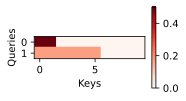

In [ ]:
d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)), # num_rows, num_cols, matrix
                  xlabel='Keys', ylabel='Queries')

## 10.3.3 Scaled Dot-Product Attention

- 효율적인 연산 방법은 내적연산 (dot product)을 구하는 것 
- 내적연산을 위해 Query와 Key는 벡터 길이가 같아야
- 가정: Query, Key의 모든 요소가 independent random variable로 평균 0, 단위 분산 (unit variance)
- 벡터의 길이에 관계없이 내적연산의 분산=1 유지하기 위해 $\sqrt{d}$로 나눔

$$a(\mathbf q, \mathbf k) = \mathbf{q}^\top \mathbf{k}  /\sqrt{d}$$

- 실전에서는, 효율성을 고려해 미니배치 단위로 생각하는 경향이 있다

- 예시로, Query와 Key 길이가 𝑑이고 Value 길이가 𝑣인, 𝑛개의 Queries와 𝑚개의 Key-Value 쌍을 갖고 attention을 구한다 

- 교정된 (scaled) dot-product attention은 아래식과 같이 나타낼 수 있다

    (queries  𝐐∈ℝ𝑛×𝑑, keys  𝐊∈ℝ𝑚×𝑑, values  𝐕∈ℝ𝑚×𝑣)

$$ \mathrm{softmax}\left(\frac{\mathbf Q \mathbf K^\top }{\sqrt{d}}\right) \mathbf V \in \mathbb{R}^{n\times v}.$$


- 아래 예시에서 모델 정규화를 위해 dropout을 사용

In [ ]:
class DotProductAttention(nn.Module):
    """Scaled dot product attention."""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # Shape of queries: (batch_size, no. of queries, d)
    # Shape of keys: (batch_size, no. of key-value pairs, d)
    # Shape of values: (batch_size, no. of key-value pairs, value dimension)
    # Shape of valid_lens: (batch_size,) or (batch_size, no. of queries)
    
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        
        # Set transpose_b=True to swap the last two dimensions of keys
        scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)
        
        self.attention_weights = masked_softmax(scores, valid_lens)
        
        return torch.bmm(self.dropout(self.attention_weights), values)

`DotProductAttention` class가 working하는 것을 보여줄 때: 

  - 위 'Additive attention' 예제와  동일한 Keys, Values, Valid lengths 사용

  - 내적연산을 위해 Query와 Key의 feature size 동일하게 만듬

In [ ]:
# queries = torch.normal(mean=0, std=1, size=(2, 1, 20))
queries = torch.normal(mean=0, std=1, size=(2, 1, 2))
keys = torch.ones((2, 10, 2))
values = torch.arange(40, dtype=torch.float32).reshape(1, 10, 4).repeat(2, 1, 1) # shape: ([2, 10, 4])
valid_lens = torch.tensor([2, 6])

attention = DotProductAttention(dropout=0.5)
attention.eval()
attention(queries, keys, values, valid_lens)

tensor([[[ 2.0000,  3.0000,  4.0000,  5.0000]],

        [[10.0000, 11.0000, 12.0000, 13.0000]]])

> additive attention 예제와 마찬가지로, Key 값이 모두 동일하므로 attention weights는 다 같다

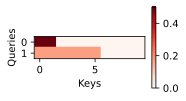

In [ ]:
d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)),
                  xlabel='Keys', ylabel='Queries')

## **10.3.4. Summary**

* We can compute the output of attention pooling as a weighted average of values, where different choices of the attention scoring function lead to different behaviors of attention pooling.\
    - 어텐션 풀링의 출력을 값의 가중 평균으로 계산할 수 있습니다. 
    - 여기서 attention scoring function의 선택은 다른 어텐션 풀링 동작으로 이어집니다.

* When queries and keys are vectors of different lengths, we can use the additive attention scoring function. When they are the same, the scaled dot-product attention scoring function is more computationally efficient.\    
    - 쿼리와 키가 길이가 다른 벡터인 경우 additive attention scoring function을 사용할 수 있습니다. 
    - 길이가 같을 때, scaled dot-product Attention Scores 함수는 계산적으로 더 효율적입니다.




## **10.3.5. Exercises**

1. Modify keys in the toy example and visualize attention weights. Do additive attention and scaled dot-product attention still output the same attention weights? Why or why not?\
    (장난감 예제에서 키를 수정하고 주의 가중치를 시각화합니다. 가산 주의와 스케일링된 내적 주의가 여전히 동일한 주의 가중치를 출력합니까? 그 이유는 무엇?)

2. Using matrix multiplications only, can you design a new scoring function for queries and keys with different vector lengths?\
    (행렬 곱셈만 사용하여 벡터 길이가 다른 쿼리 및 키에 대한 새로운 스코어링 함수를 설계할 수 있습니까?)


3. When queries and keys have the same vector length, is vector summation a better design than dot product for the scoring function? Why or why not?\
    (쿼리와 키의 벡터 길이가 같을 때 벡터 합산이 스코어링 기능에 대해 내적보다 더 나은 설계입니까? 그 이유는 무엇?)\
    > 조금 더 계산이 효율적이다.


* Attention은 **alignment score function**의 종류에 따라서 다양한 attention이 존재한다.

# 10.4 Bahdanau Attention

## 학습목표

10.4. Bahdanau attention의 동작을 이해한다. \
    
        10.4.1 Model
        10.4.2 Defining the decoder with attention
        10.4.3 Training 

<br/>
<br/>

We studied the machine translation
problem in Section 9.7,
where we designed
an encoder-decoder architecture based on two RNNs
for sequence to sequence learning.
Specifically,
the RNN encoder
transforms
a variable-length sequence
into a fixed-shape context variable,
then
the RNN decoder
generates the output (target) sequence token by token
based on the generated tokens and the context variable.
However,
even though not all the input (source) tokens
are useful for decoding a certain token,
the *same* context variable
that encodes the entire input sequence
is still used at each decoding step.

- 9.7. Seq2Seq를 학습하기 위해 2개의 RNN을 기반으로 하는 Encoder-Decoder Architecture를 만듬 
- RNN Encoder는 Seqeunce를 Context 변수로 변환하고, RNN Decoder는 생성된 토큰과 Context 변수를 기반으로 Output Seqeunce Token을 생성
- Decoder의 각 단계에서 **동일한 Context variable을 사용** 

In a separate but related
challenge of handwriting generation for a given text sequence,
Graves designed a differentiable attention model
to align text characters with the much longer pen trace,
where the alignment moves only in one direction [Graves, 2013].
Inspired by the idea of learning to align,
Bahdanau et al. proposed a differentiable attention model
without the severe unidirectional alignment limitation [Bahdanau et al., 2014].
When predicting a token,
if not all the input tokens are relevant,
the model aligns (or attends)
only to parts of the input sequence that are relevant to the current prediction.
This is achieved
by treating the context variable as an output of attention pooling.


- Graves는 손 필기 생성 변환 문제에서 differentiable attention model을 제안. (alignment moves only in one direction)
- 이후 Bahdanau가 단방향 정렬 제한이 없는 differentiable attention model을 제안. (unidirectional alignment limitation)

## 10.4.1 Model

When describing
Bahdanau attention
for the RNN encoder-decoder below,
we will follow the same notation in
Section 9.7.
The new attention-based model
is the same as that
in Section 9.7
except that
the context variable
$\mathbf{c}$
in
(9.7.3)
is replaced by
$\mathbf{c}_{t'}$
at any decoding time step $t'$.
Suppose that
there are $T$ tokens in the input sequence,
the context variable at the decoding time step $t'$
is the output of attention pooling:


- Bahdanau attention은 seq2seq과 Context variable을 제외하고 동일함. 

동영상 (Seq2seq vs. Seq2seq with attention)

$$\mathbf{c}_{t'} = \sum_{t=1}^T \alpha(\mathbf{s}_{t' - 1}, \mathbf{h}_t) \mathbf{h}_t,$$


  - context variable = ${c}_{t'}$ 
  - decoder hidden state $\mathbf{s}_{t' - 1}$ 
  - encoder hidden states = ${h}_t$ 
  - attention weight = $\alpha$ 


where the decoder hidden state
$\mathbf{s}_{t' - 1}$ at time step $t' - 1$
is the query,
and the encoder hidden states $\mathbf{h}_t$
are both the keys and values,
and the attention weight $\alpha$
is computed as in
(10.3.2)
using the additive attention scoring function
defined by
(10.3.3).


- Bahdanau attention은 10.3.3에서 사용한 Additive attention scoring function을 사용 함.


Slightly different from
the vanilla RNN encoder-decoder architecture
in Fig. 9.7.2,
the same architecture
with Bahdanau attention is depicted in Fig. 10.4.1.

![Layers in an RNN encoder-decoder model with Bahdanau attention.](https://d2l.ai/_images/seq2seq-attention-details.svg)

##10.4.2 Defining the Decoder with Attention

To implement the RNN encoder-decoder
with Bahdanau attention,
we only need to redefine the decoder.
To visualize the learned attention weights more conveniently,
the following `AttentionDecoder` class
defines **the base interface for
decoders with attention mechanisms**.

- seq2seq과 동일한 디코더를 상속받은 Attention Decoder를 Base interface로 정의

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class AttentionDecoder(d2l.Decoder):
    """The base attention-based decoder interface."""
    def __init__(self, **kwargs):
        super(AttentionDecoder, self).__init__(**kwargs)

    @property
    def attention_weights(self):
        raise NotImplementedError

Now let us **implement
the RNN decoder with Bahdanau attention**
in the following `Seq2SeqAttentionDecoder` class.
The state of the decoder
is initialized with
(i) the encoder final-layer hidden states at all the time steps (as keys and values of the attention);
(ii) the encoder all-layer hidden state at the final time step (to initialize the hidden state of the decoder);
and (iii) the encoder valid length (to exclude the padding tokens in attention pooling).
At each decoding time step,
the decoder final-layer hidden state at the previous time step is used as the query of the attention.
As a result, both the attention output
and the input embedding are concatenated
as the input of the RNN decoder.

- Seq2SeqAttentionDecoder 구현 ; 
    - init ; encoder의 모든 hidden_states를 attention의 key와 value로 사용
        - (1) encoder에서 모든 T의 Hidden states
        - (2) encoder에서 마지막 T의 Hidden state
        - (3) encoder valid length (attention pooling에서 패딩 토큰을 제외하기 위해)
    - 각 decoder 단계에서 이전 단계의 hidden_state가 query로 사용
    - 결과적으로 Attention 출력과 입력 임베딩 모두 RNN 디코더의 입력으로 연결


In [ ]:
class Seq2SeqAttentionDecoder(AttentionDecoder):
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers,
                 dropout=0, **kwargs):
        super(Seq2SeqAttentionDecoder, self).__init__(**kwargs)
        self.attention = d2l.AdditiveAttention(num_hiddens, num_hiddens, num_hiddens, dropout)
        # self.attention = d2l.DotProductAttention(dropout)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size + num_hiddens, num_hiddens, num_layers, dropout=dropout)
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        # Shape of outputs: (num_steps, batch_size, num_hiddens)
        # Shape of hidden_state[0]: (num_layers, batch_size, num_hiddens)
        outputs, hidden_state = enc_outputs
        return (outputs.permute(1, 0, 2), hidden_state, enc_valid_lens)

    def forward(self, X, state):
        # Shape of enc_outputs: (batch_size, num_steps, num_hiddens)
        enc_outputs, hidden_state, enc_valid_lens = state
        
        # Shape of the output X: (num_steps, batch_size, embed_size)
        X = self.embedding(X).permute(1, 0, 2)
        
        outputs, self._attention_weights = [], []
        
        for x in X:
            # Shape of query: (batch_size, 1, num_hiddens)
            query = torch.unsqueeze(hidden_state[-1], dim=1)
            
            # Shape of context: (batch_size, 1, num_hiddens)
            context = self.attention(query, enc_outputs, enc_outputs, enc_valid_lens)
            
            # Concatenate on the feature dimension
            x = torch.cat((context, torch.unsqueeze(x, dim=1)), dim=-1)
            
            # Reshape x as (1, batch_size, embed_size+num_hiddens)
            out, hidden_state = self.rnn(x.permute(1, 0, 2), hidden_state)
            
            outputs.append(out)
            
            self._attention_weights.append(self.attention.attention_weights)

        # After FC layer, outputs shape: ([batch_size, num_steps, vocab_size])
        outputs = self.dense(torch.cat(outputs, dim=0))
        return outputs.permute(1, 0, 2), [enc_outputs, hidden_state, enc_valid_lens]

    @property
    def attention_weights(self):
        return self._attention_weights

In the following, we **test the implemented
decoder** with Bahdanau attention
using a minibatch of 4 sequence inputs
of 7 time steps.


 - batch_size = 4, num_steps = 7로 test ㄱㄱ

In [ ]:
encoder = d2l.Seq2SeqEncoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2)
encoder.eval()

decoder = Seq2SeqAttentionDecoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2)
decoder.eval()

X = torch.zeros((4, 7), dtype=torch.long)
state = decoder.init_state(encoder(X), None)

output, state = decoder(X, state)
output.shape, len(state), state[0].shape

(torch.Size([4, 7, 10]), 3, torch.Size([4, 7, 16]))

## 10.4.3 Training 

Similar to :numref:`sec_seq2seq_training`,
here we specify hyperparemeters,
instantiate
an encoder and a decoder with Bahdanau attention,
and train this model for machine translation.
Due to the newly added attention mechanism,
this training is much slower than
that in :numref:`sec_seq2seq_training` without attention mechanisms.
 - Section 9.7.4와 유사하게 hyperparemeters를 지정하고 Bahdanau 주의로 인코더와 디코더를 인스턴스화하고 기계 번역을 위해 이 모델을 훈련해보자. 
 - 새로 추가된 attention mechanism으로 인해 이 학습은 attention mechanism이 없는 Section 9.7.4에서 보다 훨씬 느리다.

loss 0.020, 4255.8 tokens/sec on cpu


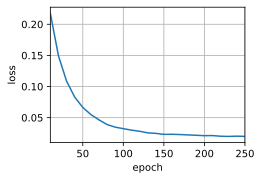

In [ ]:
embed_size, num_hiddens, num_layers, dropout = 32, 32, 2, 0.1
batch_size, num_steps = 64, 10
lr, num_epochs, device = 0.005, 250, torch.device('cpu')

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)

encoder = d2l.Seq2SeqEncoder(
    len(src_vocab), embed_size, num_hiddens, num_layers, dropout)

decoder = Seq2SeqAttentionDecoder(
    len(tgt_vocab), embed_size, num_hiddens, num_layers, dropout)

net = d2l.EncoderDecoder(encoder, decoder)

d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

***9.7) seq2seq　　　　　　　　　　> 1m 12.9s / loss 0.019, 8607.6 tokens/sec on cpu***\
***10.4) seq2seq with attention　　 > 1m 37.2s / loss 0.021, 5952.8 tokens/sec on cpu***

After the model is trained, we use it to **translate a few English sentences** into French and compute their BLEU scores.
 - **BLEU(Bilingual Evaluation Understudy) score** 번역 성능 평가

In [ ]:
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
for eng, fra in zip(engs, fras):
    translation, dec_attention_weight_seq = d2l.predict_seq2seq(net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    # BLEU(Bilingual Evaluation Understudy)score-정답 문장과 번역된 문장 간 얼마나 비슷한지를 평가
    print(f'{eng} => {translation}',
          f'bleu {d2l.bleu(translation, fra, k=2):.3f}')

go . => va ! bleu 1.000
i lost . => j'ai perdu . bleu 1.000
he's calm . => il est paresseux . bleu 0.658
i'm home . => je suis chez moi . bleu 1.000


In [ ]:
attention_weights = torch.cat([step[0][0][0] for step in dec_attention_weight_seq], 0).reshape((1, 1, -1, num_steps))

 > 마지막 영어 문장을 번역할 때 주의 가중치를 시각화하여 각 쿼리가 키-값 쌍에 대해 균일하지 않은 가중치를 할당하는 것을 볼 수 있음. 
 
> 각 디코딩 단계에서 입력 시퀀스의 서로 다른 부분이 attention pooling에서 선택적으로 집계됨.

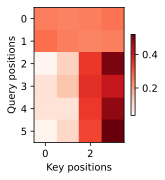

In [ ]:
# Plus one to include the end-of-sequence token
d2l.show_heatmaps(
    attention_weights[:, :, :, :len(engs[1].split()) + 1].cpu(),
    xlabel='Key positions', ylabel='Query positions')

## 10.4.4 Summary

* When predicting a token, if not all the input tokens are relevant, the RNN encoder-decoder with Bahdanau attention selectively aggregates different parts of the input sequence. This is achieved by treating the context variable as an output of additive attention pooling.

    > 토큰을 예측할 때 모든 입력 토큰이 관련이 없는 경우 Bahdanau 주의가 있는 RNN 인코더-디코더는 입력 시퀀스의 다른 부분을 선택적으로 집계. 이것은 context variable를 additive attention pooling의 출력으로 처리하여 달성.


* In the RNN encoder-decoder, Bahdanau attention treats the decoder hidden state at the previous time step as the query, and the encoder hidden states at all the time steps as both the keys and values.

    > RNN 인코더-디코더에서 Bahdanau Attention은 이전 시간 단계의 디코더 hidden state를 Query로 처리하고 모든 시간 단계의 인코더 hidden state를 Key와 Value로 받음

## 10.4.5 Exercises

1. Replace GRU with LSTM in the experiment.\
   (실험에서 GRU를 LSTM으로 교체합니다.)


2. Modify the experiment to replace the additive attention scoring function with the scaled dot-product. How does it influence the training efficiency?\
   (additive attention function을 scaled dot-product으로 변경 시, 훈련 효율성에 어떤 영향을 미칩니까?)
> ***10.4) seq2seq with attention ; Additive Attention > 1m 37.2s / loss 0.021, 5952.8 tokens/sec on cpu***\
> ***10.4) seq2seq with attention ; DotProductAttention > 1m 25.7s / loss 0.020, 6433.9 tokens/sec on cpu***\